<a href="https://colab.research.google.com/github/Thrishal1105/Sales-Forecasting-of-Overrated-Products/blob/main/Sales_Overrated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Datasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
#nltk.download('vader_lexicon')
import nltk.corpus
import os
import sys
import json


In [ ]:
from collections import Counter

**Load Data All_Beauty**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import json
data = []
error_lines = []
with open('/content/drive/MyDrive/All_Beauty.jsonl', 'r') as f:
    for i, line in enumerate(f):
        try:
            data.append(json.loads(line))
        except json.JSONDecodeError as e:
            error_lines.append(f"Line {i+1}: {e} - {line.strip()}")
no_data = len(data)
# if error_lines:
#     # print("Errors encountered while parsing JSON lines:")
#     for err in error_lines:
#         print(err)

Mounted at /content/drive


In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701528 entries, 0 to 701527
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             701528 non-null  float64
 1   title              701528 non-null  object 
 2   text               701528 non-null  object 
 3   images             701528 non-null  object 
 4   asin               701528 non-null  object 
 5   parent_asin        701528 non-null  object 
 6   user_id            701528 non-null  object 
 7   timestamp          701528 non-null  int64  
 8   helpful_vote       701528 non-null  int64  
 9   verified_purchase  701528 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 48.8+ MB


In [ ]:
print(f"Number of All_Beauty rows in df: {df.shape}")

Number of All_Beauty rows in df: (701528, 10)


In [ ]:
display(df.head())

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True
2,5.0,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,1589665266052,2,True
3,1.0,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1643393630220,0,True
4,5.0,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1609322563534,0,True


**Load Data Meta All Beauty**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import json
meta_data = []
error_lines = []
with open('/content/drive/MyDrive/meta_All_Beauty.jsonl', 'r') as f:
    for i, line in enumerate(f):
        try:
            meta_data.append(json.loads(line))
        except json.JSONDecodeError as e:
            error_lines.append(f"Line {i+1}: {e} - {line.strip()}")
no_data = len(meta_data)

# if meta_error_lines:
#     # print("Errors encountered while parsing meta_All_Beauty.jsonl:")
#     for err in meta_error_lines:
#         print(err)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
meta_df = pd.DataFrame(meta_data)

In [ ]:
print(f"Number of meta_All_Beauty rows in meta_df: {meta_df.shape}")

Number of meta_All_Beauty rows in meta_df: (112590, 14)


In [ ]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112590 entries, 0 to 112589
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   main_category    112590 non-null  object 
 1   title            112590 non-null  object 
 2   average_rating   112590 non-null  float64
 3   rating_number    112590 non-null  int64  
 4   features         112590 non-null  object 
 5   description      112590 non-null  object 
 6   price            17704 non-null   float64
 7   images           112590 non-null  object 
 8   videos           112590 non-null  object 
 9   store            101259 non-null  object 
 10  categories       112590 non-null  object 
 11  details          112590 non-null  object 
 12  parent_asin      112590 non-null  object 
 13  bought_together  0 non-null       object 
dtypes: float64(2), int64(1), object(11)
memory usage: 12.0+ MB


In [ ]:

display(meta_df.head())

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together
0,All Beauty,"Howard LC0008 Leather Conditioner, 8-Ounce (4-...",4.8,10,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Howard Products,[],{'Package Dimensions': '7.1 x 5.5 x 3 inches; ...,B01CUPMQZE,None
1,All Beauty,Yes to Tomatoes Detoxifying Charcoal Cleanser ...,4.5,3,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Yes To,[],"{'Item Form': 'Powder', 'Skin Type': 'Acne Pro...",B076WQZGPM,None
2,All Beauty,Eye Patch Black Adult with Tie Band (6 Per Pack),4.4,26,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Levine Health Products,[],{'Manufacturer': 'Levine Health Products'},B000B658RI,None
3,All Beauty,"Tattoo Eyebrow Stickers, Waterproof Eyebrow, 4...",3.1,102,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Cherioll,[],"{'Brand': 'Cherioll', 'Item Form': 'Powder', '...",B088FKY3VD,None
4,All Beauty,Precision Plunger Bars for Cartridge Grips – 9...,4.3,7,"[Material: 304 Stainless Steel; Brass tip, Len...",[The Precision Plunger Bars are designed to wo...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Precision,[],{'UPC': '644287689178'},B07NGFDN6G,None


In [ ]:
#Remove the Duplicates in All beauty file
df = df.drop_duplicates(subset=['user_id','timestamp','parent_asin'])
df

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True
2,5.0,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,1589665266052,2,True
3,1.0,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1643393630220,0,True
4,5.0,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1609322563534,0,True
...,...,...,...,...,...,...,...,...,...,...
701523,4.0,Four Stars,Conditioner is great shampoo not as I expected,[],B006YUIWKA,B006YUIWKA,AFIXGFVEGLMOTMBTJL7H3VSIETDQ,1478227021000,0,True
701524,1.0,Pretty,Did not work! Used the whole bottle and my hai...,[],B006YUIWKA,B006YUIWKA,AFV7YZFOJF564EZGET5LG45K4QEA,1480908730000,0,False
701525,5.0,Great sunless tanner,Product as expected. Shipping was on time.,[],B06ZZV9MZT,B06ZZV9MZT,AHYDCWDMMVMLBX7FY7M7JKADKRDQ,1590547974067,0,True
701526,5.0,The Crown on top is a Ring!!!,"Not only is it a delicious fragrance, but also...",[],B000HB6VLE,B000HB6VLE,AF6ZIAEN7TQ2WY5ZL77F6JDPV7XQ,1184798209000,4,False


# Develop Model

In [ ]:
#TEXT PREPARATION (NLP PREPROCESSING)

import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'<.*?>', '', text)      # remove HTML
    text = re.sub(r'[^a-z\s]', '', text)   # keep only letters
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Combine title + review text
df['full_review'] = (df['title'] + " " + df['text']).apply(clean_text)

df[['rating', 'full_review']].head()


,rating,full_review
0,5.0,such a lovely scent but not overpowering this ...
1,4.0,works great but smells a little weird this pro...
2,5.0,yes smells good feels great
3,1.0,synthetic feeling felt synthetic
4,5.0,a love it


In [ ]:
#SENTIMENT ANALYSIS (CORE NLP STEP)

from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

df['sentiment_score'] = df['full_review'].apply(
    lambda x: sia.polarity_scores(x)['compound']
)

df[['rating', 'sentiment_score']].head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,rating,sentiment_score
0,5.0,0.9212
1,4.0,0.9318
2,5.0,0.8658
3,1.0,0.1280
4,5.0,0.6369


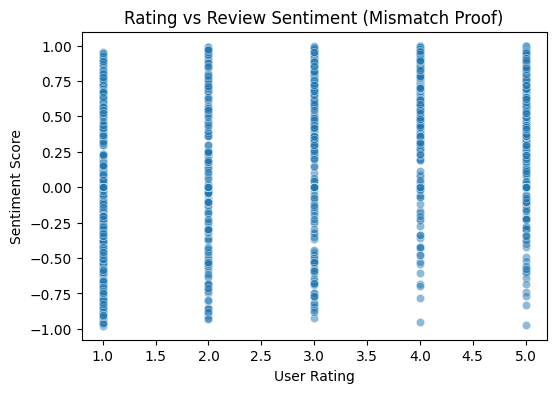

In [ ]:
#VERIFY THE CORE PROBLEM (IMPORTANT CHECK)

sample_df = df.sample(3000, random_state=42)

plt.figure(figsize=(6,4))
sns.scatterplot(
    data=sample_df,
    x='rating',
    y='sentiment_score',
    alpha=0.5
)
plt.title("Rating vs Review Sentiment (Mismatch Proof)")
plt.xlabel("User Rating")
plt.ylabel("Sentiment Score")
plt.show()


In [ ]:
#CREATE SENTIMENT-TUNED RATING (YOUR SOLUTION)

df['sentiment_tuned_rating'] = (
    0.7 * df['rating'] +
    0.3 * ((df['sentiment_score'] + 1) * 2.5)
)

df[['rating', 'sentiment_tuned_rating']].head()


,rating,sentiment_tuned_rating
0,5.0,4.940900
1,4.0,4.248850
2,5.0,4.899350
3,1.0,1.546000
4,5.0,4.727675


In [ ]:
#IDENTIFY OVERRATED PRODUCTS (KEY OUTPUT)

df['rating_gap'] = df['rating'] - df['sentiment_tuned_rating']

overrated_df = df[df['rating_gap'] > 1.5]

overrated_df[['parent_asin', 'rating', 'sentiment_tuned_rating']].head()


,parent_asin,rating,sentiment_tuned_rating


**TIME-SERIES DATA PREPARATION**

In [ ]:
df['review_date'] = pd.to_datetime(df['timestamp'], unit='ms')

df[['timestamp', 'review_date']].head()


,timestamp,review_date
0,1588687728923,2020-05-05 14:08:48.923
1,1588615855070,2020-05-04 18:10:55.070
2,1589665266052,2020-05-16 21:41:06.052
3,1643393630220,2022-01-28 18:13:50.220
4,1609322563534,2020-12-30 10:02:43.534


In [ ]:
monthly_df = df.groupby(
    pd.Grouper(key='review_date', freq='M')
).agg({
    'sentiment_tuned_rating': 'mean',
    'rating': 'mean',
    'parent_asin': 'count'
}).reset_index()

monthly_df.rename(columns={
    'parent_asin': 'review_count'
}, inplace=True)

monthly_df.head()


/tmp/ipython-input-780824953.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(key='review_date', freq='M')


,review_date,sentiment_tuned_rating,rating,review_count
0,2000-11-30,4.920050,5.0,1
1,2000-12-31,NaN,NaN,0
2,2001-01-31,3.576013,3.5,2
3,2001-02-28,NaN,NaN,0
4,2001-03-31,4.971463,5.0,2


In [ ]:
ts_df = monthly_df.rename(columns={
    'review_date': 'ds',
    'sentiment_tuned_rating': 'y'
})

ts_df[['ds', 'y', 'review_count']].head()


,ds,y,review_count
0,2000-11-30,4.920050,1
1,2000-12-31,NaN,0
2,2001-01-31,3.576013,2
3,2001-02-28,NaN,0
4,2001-03-31,4.971463,2


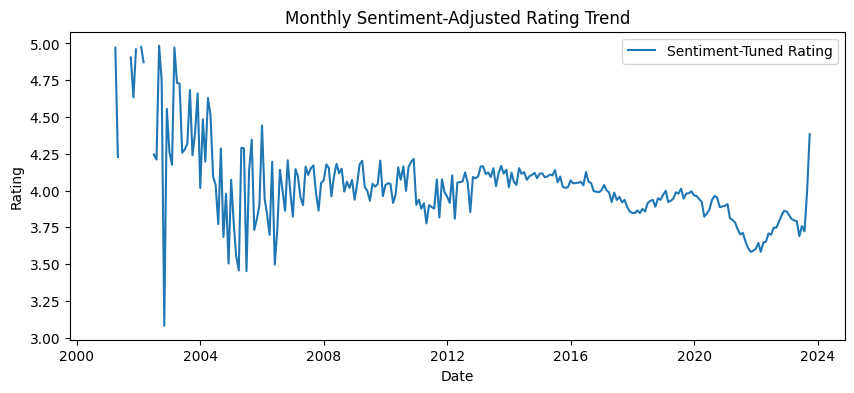

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(ts_df['ds'], ts_df['y'], label='Sentiment-Tuned Rating')
plt.title("Monthly Sentiment-Adjusted Rating Trend")
plt.xlabel("Date")
plt.ylabel("Rating")
plt.legend()
plt.show()


In [ ]:
train_size = int(len(ts_df) * 0.8)

train_df = ts_df.iloc[:train_size]
test_df = ts_df.iloc[train_size:]

print("Train size:", train_df.shape)
print("Test size:", test_df.shape)


Train size: (220, 4)
Test size: (55, 4)


# PROPHET MODEL DEVELOPMENT

In [ ]:
!pip install prophet


In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
prophet_train = train_df[['ds', 'y']].copy()
prophet_test  = test_df[['ds', 'y']].copy()

prophet_train.head()


,ds,y
0,2000-11-30,4.920050
1,2000-12-31,NaN
2,2001-01-31,3.576013
3,2001-02-28,NaN
4,2001-03-31,4.971463


In [ ]:
prophet_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)

prophet_model.fit(prophet_train)


In [ ]:
future = prophet_model.make_future_dataframe(
    periods=len(prophet_test),
    freq='M'
)

forecast = prophet_model.predict(future)


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [ ]:
forecast_test = forecast.tail(len(prophet_test))

forecast_test[['ds', 'yhat']].head()


,ds,yhat
220,2019-03-31,3.928858
221,2019-04-30,3.963358
222,2019-05-31,3.926263
223,2019-06-30,3.907734
224,2019-07-31,3.963072


In [ ]:
mae_prophet = mean_absolute_error(
    prophet_test['y'],
    forecast_test['yhat']
)

rmse_prophet = np.sqrt(mean_squared_error(
    prophet_test['y'],
    forecast_test['yhat']
))

print("Prophet MAE :", round(mae_prophet, 3))
print("Prophet RMSE:", round(rmse_prophet, 3))


Prophet MAE : 0.131
Prophet RMSE: 0.171


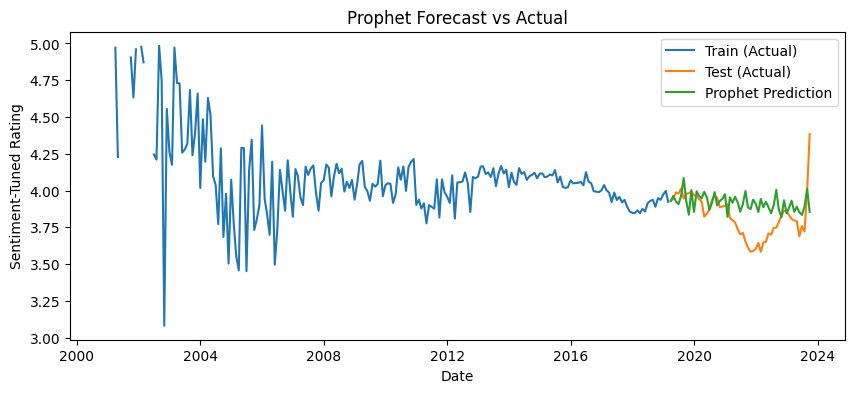

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(prophet_train['ds'], prophet_train['y'], label='Train (Actual)')
plt.plot(prophet_test['ds'], prophet_test['y'], label='Test (Actual)')
plt.plot(forecast_test['ds'], forecast_test['yhat'], label='Prophet Prediction')

plt.title("Prophet Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Sentiment-Tuned Rating")
plt.legend()
plt.show()


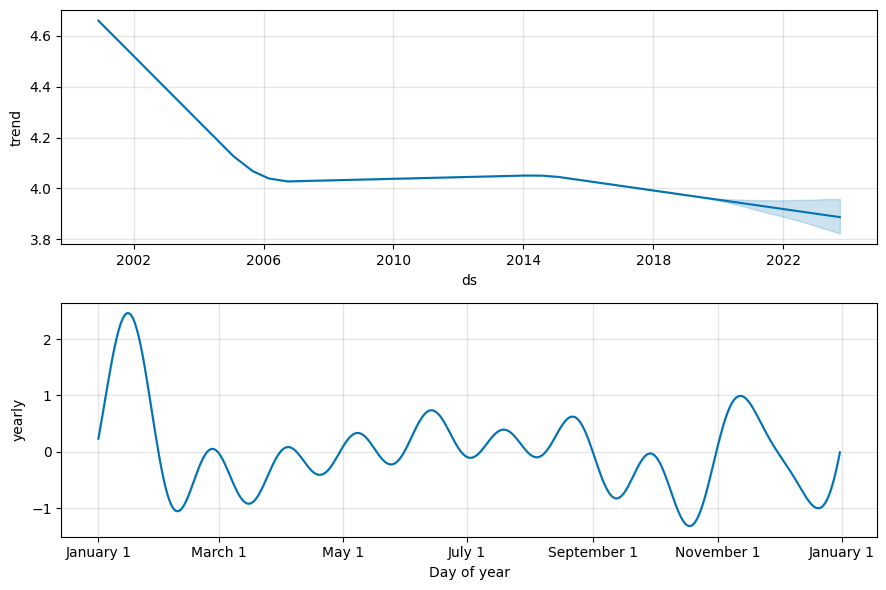

In [ ]:
prophet_model.plot_components(forecast)
plt.show()


# SARIMAX MODEL DEVELOPMENT

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
sarimax_train = train_df['y']
sarimax_test  = test_df['y']

sarimax_train.head()


,y
0,4.920050
1,NaN
2,3.576013
3,NaN
4,4.971463


In [ ]:
sarimax_model = SARIMAX(
    sarimax_train,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarimax_fit = sarimax_model.fit(disp=False)


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
sarimax_forecast = sarimax_fit.forecast(steps=len(sarimax_test))
sarimax_forecast.head()


,predicted_mean
220,3.912196
221,3.918121
222,3.921343
223,3.950258
224,3.943908


In [ ]:
mae_sarimax = mean_absolute_error(
    sarimax_test,
    sarimax_forecast
)

rmse_sarimax = np.sqrt(mean_squared_error(
    sarimax_test,
    sarimax_forecast
))

print("SARIMAX MAE :", round(mae_sarimax, 3))
print("SARIMAX RMSE:", round(rmse_sarimax, 3))


SARIMAX MAE : 0.117
SARIMAX RMSE: 0.159


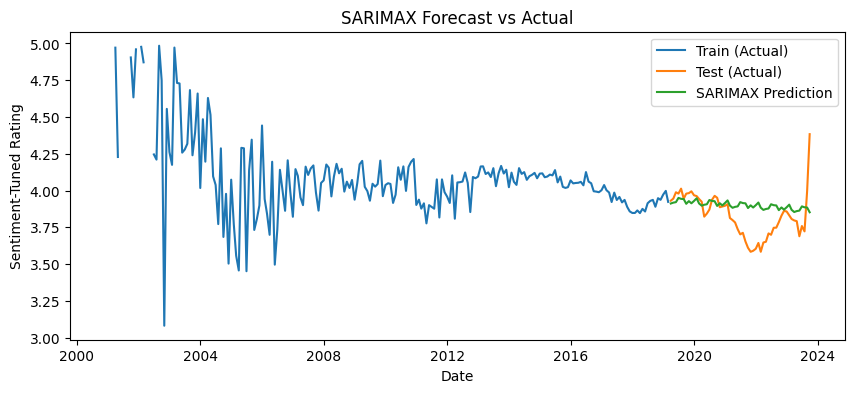

In [ ]:
plt.figure(figsize=(10,4))

plt.plot(
    train_df['ds'],
    sarimax_train,
    label='Train (Actual)'
)

plt.plot(
    test_df['ds'],
    sarimax_test,
    label='Test (Actual)'
)

plt.plot(
    test_df['ds'],
    sarimax_forecast,
    label='SARIMAX Prediction'
)

plt.title("SARIMAX Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Sentiment-Tuned Rating")
plt.legend()
plt.show()


# XGBoost MODEL DEVELOPMENT

In [ ]:
!pip install xgboost


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
xgb_df = ts_df.copy()

xgb_df['lag_1'] = xgb_df['y'].shift(1)
xgb_df['lag_2'] = xgb_df['y'].shift(2)
xgb_df['lag_3'] = xgb_df['y'].shift(3)

xgb_df.dropna(inplace=True)

xgb_df.head()


,ds,y,rating,review_count,lag_1,lag_2,lag_3
22,2002-09-30,4.749175,4.750000,4,4.984625,4.210525,4.245808
23,2002-10-31,3.081488,3.000000,2,4.749175,4.984625,4.210525
24,2002-11-30,4.555388,4.500000,2,3.081488,4.749175,4.984625
25,2002-12-31,4.262150,4.333333,9,4.555388,3.081488,4.749175
26,2003-01-31,4.174966,4.000000,8,4.262150,4.555388,3.081488


In [ ]:
train_size = int(len(xgb_df) * 0.8)

xgb_train = xgb_df.iloc[:train_size]
xgb_test  = xgb_df.iloc[train_size:]

X_train = xgb_train[['lag_1', 'lag_2', 'lag_3']]
y_train = xgb_train['y']

X_test = xgb_test[['lag_1', 'lag_2', 'lag_3']]
y_test = xgb_test['y']


In [ ]:
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
xgb_pred = xgb_model.predict(X_test)


In [ ]:
mae_xgb = mean_absolute_error(y_test, xgb_pred)
rmse_xgb = np.sqrt(mean_squared_error(y_test, xgb_pred))

print("XGBoost MAE :", round(mae_xgb, 3))
print("XGBoost RMSE:", round(rmse_xgb, 3))


XGBoost MAE : 0.191
XGBoost RMSE: 0.244


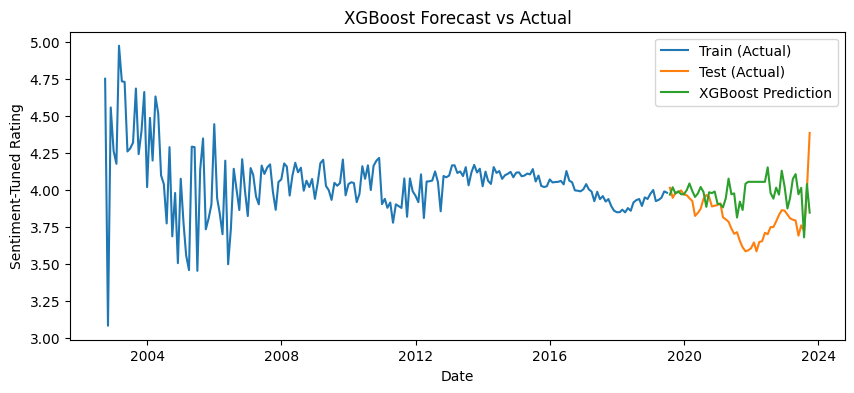

In [ ]:
plt.figure(figsize=(10,4))

plt.plot(
    xgb_train['ds'],
    y_train,
    label='Train (Actual)'
)

plt.plot(
    xgb_test['ds'],
    y_test,
    label='Test (Actual)'
)

plt.plot(
    xgb_test['ds'],
    xgb_pred,
    label='XGBoost Prediction'
)

plt.title("XGBoost Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Sentiment-Tuned Rating")
plt.legend()
plt.show()


# ENSEMBLE (COMBINED) MODEL

In [ ]:
accuracy_df = pd.DataFrame({
    'Model': ['Prophet', 'SARIMAX', 'XGBoost'],
    'MAE': [mae_prophet, mae_sarimax, mae_xgb],
    'RMSE': [rmse_prophet, rmse_sarimax, rmse_xgb]
})

accuracy_df


,Model,MAE,RMSE
0,Prophet,0.130620,0.171355
1,SARIMAX,0.117374,0.158536
2,XGBoost,0.190813,0.243897


In [ ]:
import pandas as pd

# Ensure all arrays are of the same length by aligning to the XGBoost test set's 'ds' values
# The xgb_test DataFrame contains the 'ds' values for which xgb_pred was generated
xgb_test_ds = xgb_test['ds'].values

# Filter the actual values (from test_df) to include only the 'ds' values present in xgb_test_ds
aligned_actual = test_df[test_df['ds'].isin(xgb_test_ds)]['y'].values

# Filter Prophet predictions to align with the same 'ds' values
aligned_prophet_preds = forecast_test[forecast_test['ds'].isin(xgb_test_ds)]['yhat'].values

# Filter SARIMAX predictions to align with the same 'ds' values
# Create a temporary DataFrame for sarimax_forecast to easily filter by 'ds'
sarimax_forecast_df = pd.DataFrame({
    'ds': test_df['ds'],
    'sarimax_pred': sarimax_forecast
})
aligned_sarimax_preds = sarimax_forecast_df[sarimax_forecast_df['ds'].isin(xgb_test_ds)]['sarimax_pred'].values

# Now, all arrays should have the same length, which is len(xgb_test)
ensemble_df = pd.DataFrame({
    'ds': xgb_test_ds, # Use xgb_test_ds for the 'ds' column as it's the reference
    'actual': aligned_actual,
    'prophet': aligned_prophet_preds,
    'sarimax': aligned_sarimax_preds,
    'xgboost': xgb_pred
})

ensemble_df.head()

,ds,actual,prophet,sarimax,xgboost
0,2019-07-31,4.013185,3.963072,3.943908,3.966618
1,2019-08-31,3.945084,4.085420,3.942188,4.016548
2,2019-09-30,3.979338,3.928387,3.910254,3.973917
3,2019-10-31,3.982676,3.836028,3.928441,3.989450
4,2019-11-30,3.994999,4.003371,3.913680,3.968969


In [ ]:
w_prophet = 0.4
w_sarimax = 0.3
w_xgb = 0.3

ensemble_df['ensemble_pred'] = (
    w_prophet * ensemble_df['prophet'] +
    w_sarimax * ensemble_df['sarimax'] +
    w_xgb * ensemble_df['xgboost']
)

ensemble_df.head()


,ds,actual,prophet,sarimax,xgboost,ensemble_pred
0,2019-07-31,4.013185,3.963072,3.943908,3.966618,3.958386
1,2019-08-31,3.945084,4.085420,3.942188,4.016548,4.021789
2,2019-09-30,3.979338,3.928387,3.910254,3.973917,3.936606
3,2019-10-31,3.982676,3.836028,3.928441,3.989450,3.909778
4,2019-11-30,3.994999,4.003371,3.913680,3.968969,3.966143


In [ ]:
mae_ensemble = mean_absolute_error(
    ensemble_df['actual'],
    ensemble_df['ensemble_pred']
)

rmse_ensemble = np.sqrt(mean_squared_error(
    ensemble_df['actual'],
    ensemble_df['ensemble_pred']
))

print("ENSEMBLE MAE :", round(mae_ensemble, 3))
print("ENSEMBLE RMSE:", round(rmse_ensemble, 3))


ENSEMBLE MAE : 0.145
ENSEMBLE RMSE: 0.187


In [ ]:
new_row = pd.DataFrame([{    'Model': 'Ensemble',
    'MAE': mae_ensemble,
    'RMSE': rmse_ensemble
}])
accuracy_df = pd.concat([accuracy_df, new_row], ignore_index=True)

accuracy_df

,Model,MAE,RMSE
0,Prophet,0.130620,0.171355
1,SARIMAX,0.117374,0.158536
2,XGBoost,0.190813,0.243897
3,Ensemble,0.145351,0.187209


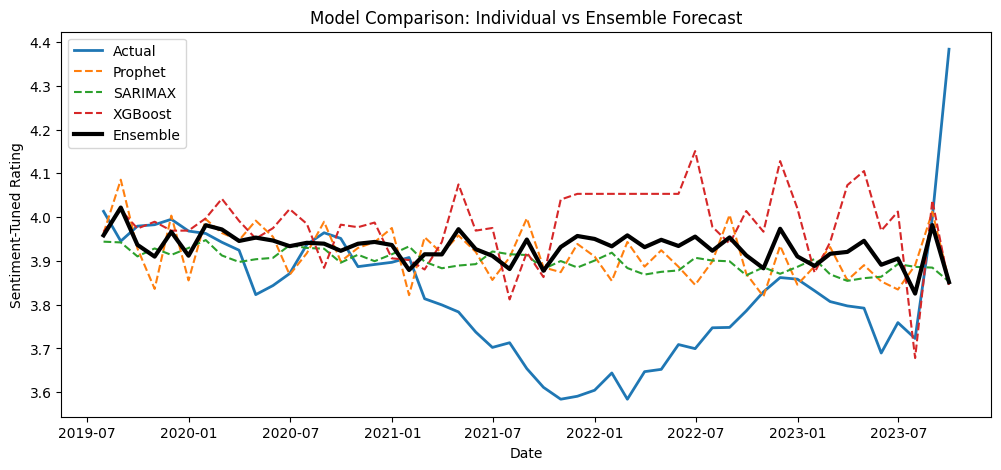

In [ ]:
plt.figure(figsize=(12,5))

plt.plot(
    ensemble_df['ds'],
    ensemble_df['actual'],
    label='Actual',
    linewidth=2
)

plt.plot(
    ensemble_df['ds'],
    ensemble_df['prophet'],
    label='Prophet',
    linestyle='--'
)

plt.plot(
    ensemble_df['ds'],
    ensemble_df['sarimax'],
    label='SARIMAX',
    linestyle='--'
)

plt.plot(
    ensemble_df['ds'],
    ensemble_df['xgboost'],
    label='XGBoost',
    linestyle='--'
)

plt.plot(
    ensemble_df['ds'],
    ensemble_df['ensemble_pred'],
    label='Ensemble',
    color='black',
    linewidth=3
)

plt.title("Model Comparison: Individual vs Ensemble Forecast")
plt.xlabel("Date")
plt.ylabel("Sentiment-Tuned Rating")
plt.legend()
plt.show()


In [ ]:
import joblib

ensemble_artifact = {
    'prophet_model': prophet_model,
    'sarimax_model': sarimax_fit,
    'xgb_model': xgb_model,
    'weights': {
        'prophet': w_prophet,
        'sarimax': w_sarimax,
        'xgboost': w_xgb
    }
}

joblib.dump(ensemble_artifact, 'ensemble_rating_model.pkl')


['ensemble_rating_model.pkl']

# Test Example

In [ ]:
import joblib

ensemble_artifact = joblib.load('ensemble_rating_model.pkl')

prophet_model = ensemble_artifact['prophet_model']
sarimax_model = ensemble_artifact['sarimax_model']
xgb_model = ensemble_artifact['xgb_model']
weights = ensemble_artifact['weights']


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
import re

sia = SentimentIntensityAnalyzer()

def extract_sentiment(review_text):
    review_text = re.sub(r'[^a-zA-Z\s]', '', review_text.lower())
    return sia.polarity_scores(review_text)['compound']


In [ ]:
def without_model_rating(user_rating):
    return user_rating


In [ ]:
def with_model_rating(review_text):
    # Step 1: NLP
    sentiment = extract_sentiment(review_text)

    # Step 2: Prophet prediction (next step)
    future = prophet_model.make_future_dataframe(periods=1, freq='M')
    prophet_pred = prophet_model.predict(future)['yhat'].iloc[-1]

    # Step 3: SARIMAX prediction
    sarimax_pred = sarimax_model.forecast(steps=1).iloc[0]

    # Step 4: XGBoost prediction (use last known lag values)
    last_lags = X_test.iloc[[-1]]   # from earlier XGBoost step
    xgb_pred = xgb_model.predict(last_lags)[0]

    # Step 5: Ensemble combination
    final_rating = (
        weights['prophet'] * prophet_pred +
        weights['sarimax'] * sarimax_pred +
        weights['xgboost'] * xgb_pred
    )

    # Safety clamp
    final_rating = max(1, min(5, final_rating))

    return round(final_rating, 2)


In [ ]:
def review_level_rating(review_text, user_rating):
    sentiment = extract_sentiment(review_text)

    corrected = (
        0.6 * user_rating +
        0.4 * ((sentiment + 1) * 2.5)
    )

    return round(max(1, min(5, corrected)), 2)


In [ ]:
def forecast_adjustment():
    future = prophet_model.make_future_dataframe(periods=1, freq='M')
    prophet_pred = prophet_model.predict(future)['yhat'].iloc[-1]

    sarimax_pred = sarimax_model.forecast(steps=1).iloc[0]
    xgb_pred = xgb_model.predict(X_test.iloc[[-1]])[0]

    ensemble_forecast = (
        weights['prophet'] * prophet_pred +
        weights['sarimax'] * sarimax_pred +
        weights['xgboost'] * xgb_pred
    )

    return ensemble_forecast


In [ ]:
def final_rating(review_text, user_rating):
    review_based = review_level_rating(review_text, user_rating)
    forecast_based = forecast_adjustment()

    final = 0.7 * review_based + 0.3 * forecast_based

    return round(max(1, min(5, final)), 2)


In [ ]:
examples = [
    ("It's good, but battery died after two days", 5),
    ("Excellent product, works perfectly", 5),
    ("Worst quality, waste of money", 4),
    ("Very bad quality, stopped working in one week. Waste of money",4),
    ("It's good, but the battery is dead after two days",5),
    ("Excellent product, battery lasts long and performance is amazing",5)
]

for text, rating in examples:
    print(text)
    print("Final Rating:", final_rating(text, rating))
    print("-----")


It's good, but battery died after two days
Final Rating: 3.54
-----
Excellent product, works perfectly
Final Rating: 4.56
-----
Worst quality, waste of money
Final Rating: 3.0
-----
Very bad quality, stopped working in one week. Waste of money


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


Final Rating: 2.97
-----
It's good, but the battery is dead after two days
Final Rating: 3.47
-----
Excellent product, battery lasts long and performance is amazing
Final Rating: 4.54
-----


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


# Bar Chats

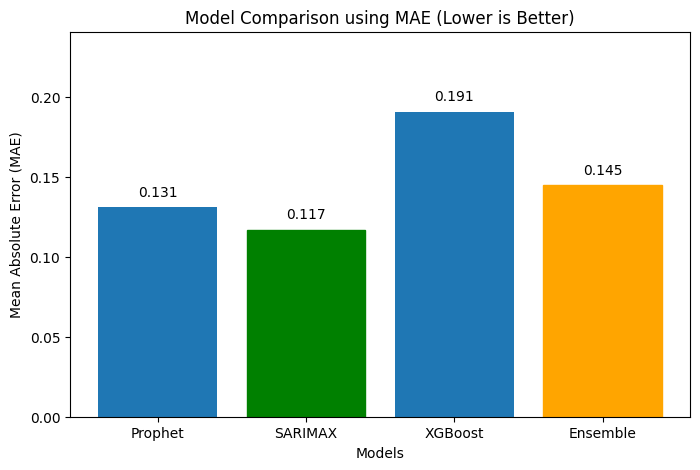

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Your results
models = ['Prophet', 'SARIMAX', 'XGBoost', 'Ensemble']
mae_values = [0.131, 0.117, 0.191, 0.145]

# Create DataFrame
accuracy_df = pd.DataFrame({
    'Model': models,
    'MAE': mae_values
})

# Plot bar chart
plt.figure(figsize=(8,5))
bars = plt.bar(accuracy_df['Model'], accuracy_df['MAE'])

# Highlight best model (lowest MAE)
bars[1].set_color('green')   # SARIMAX
bars[3].set_color('orange')  # Ensemble

plt.title("Model Comparison using MAE (Lower is Better)")
plt.xlabel("Models")
plt.ylabel("Mean Absolute Error (MAE)")
plt.ylim(0, max(mae_values) + 0.05)

# Show values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005,
             round(yval, 3), ha='center', va='bottom')

plt.show()


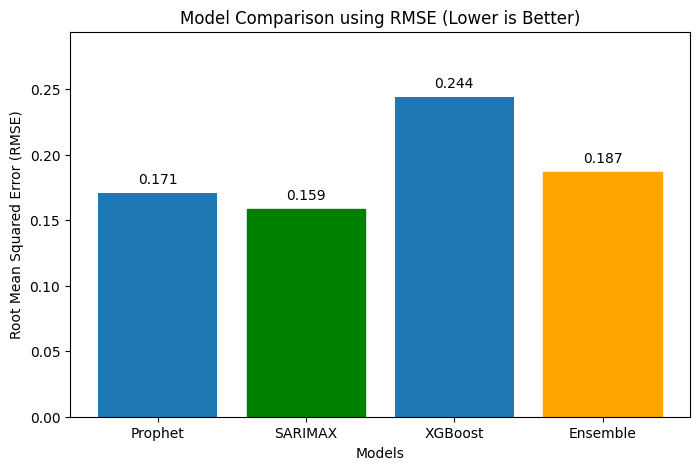

In [ ]:
rmse_values = [0.171, 0.159, 0.244, 0.187]

rmse_df = pd.DataFrame({
    'Model': models,
    'RMSE': rmse_values
})

plt.figure(figsize=(8,5))
bars = plt.bar(rmse_df['Model'], rmse_df['RMSE'])

bars[1].set_color('green')   # SARIMAX
bars[3].set_color('orange')  # Ensemble

plt.title("Model Comparison using RMSE (Lower is Better)")
plt.xlabel("Models")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.ylim(0, max(rmse_values) + 0.05)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005,
             round(yval, 3), ha='center', va='bottom')

plt.show()
